# Time series analysis of stock prices of Tesla. Data is loaded with help of Quandl library.

In [1]:
#import libraries
%matplotlib inline
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

#use statsmodels library for time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

## Download data using Quandl library

In [2]:
#download the data and store is locally
def get_stock_data():
    import quandl
    quandl.ApiConfig.api_key = ''
    #load tesla data
    tesla = quandl.get('WIKI/TSLA')
    tesla.to_csv('tesla.csv')

#get_stock_data()

## Load Data

In [3]:
#load tesla data
tesla = pd.read_csv('tesla.csv')

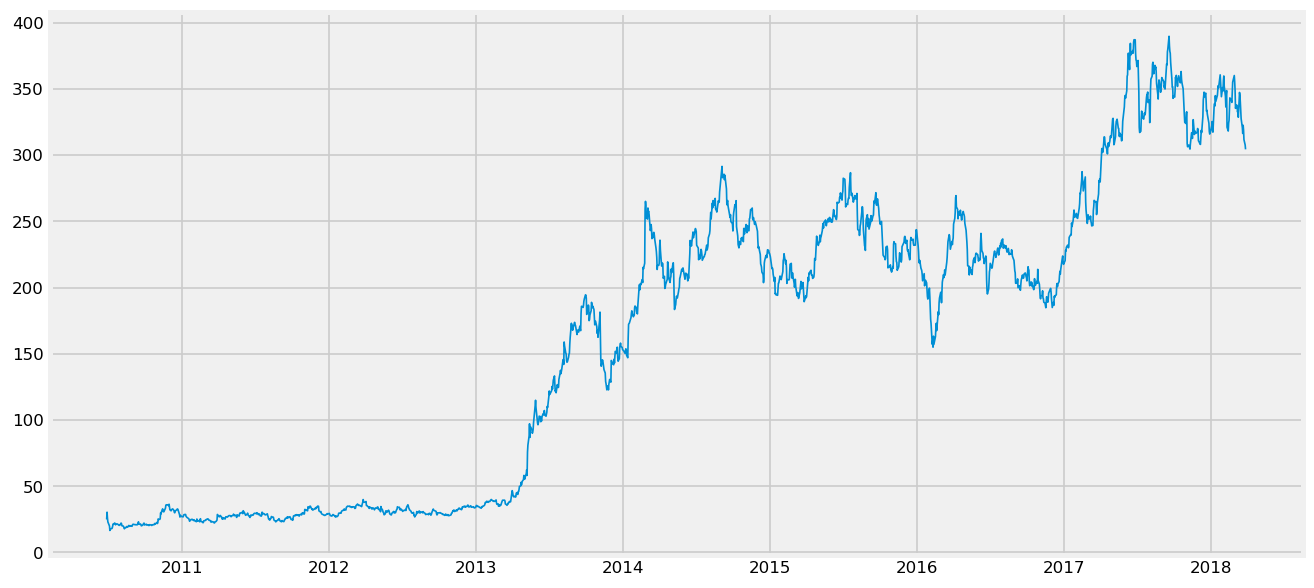

In [4]:
#take date and highest stock value of the day
tsh = tesla[['Date', 'High']].copy()
tsh['Date'] = pd.to_datetime(tsh['Date'])
series = tsh['High'].values

plt.figure(figsize=(12,6),dpi=120)
plt.plot(tsh['Date'], tsh['High'], Linewidth=1)

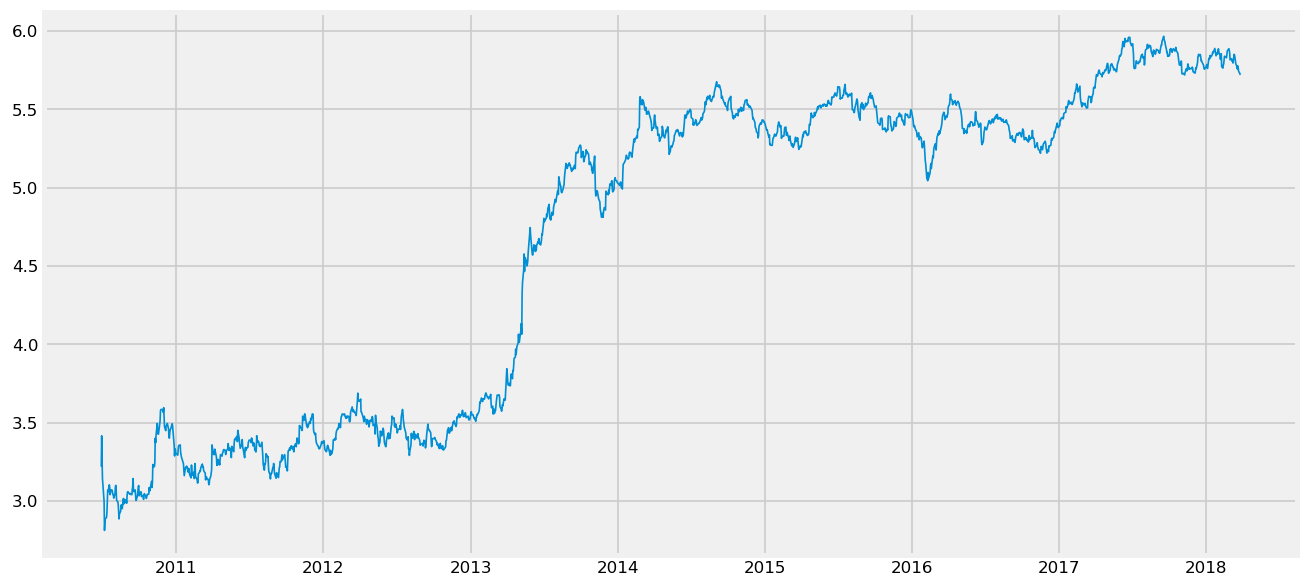

In [5]:
#log transform the data to convert exponential nature into linear nature
lnseries = np.log(series)
plt.figure(figsize=(12,6),dpi=120)
plt.plot(tsh['Date'],lnseries, Linewidth=1)

## Remove Trend from data

In [6]:
def differencing(series):
    n = series.shape[0]
    diff_series = np.empty((n-1))

    for j in range(n-1):
        diff_series[n-j-2] = series[n-j-1] - series[n-j-2]

    return diff_series

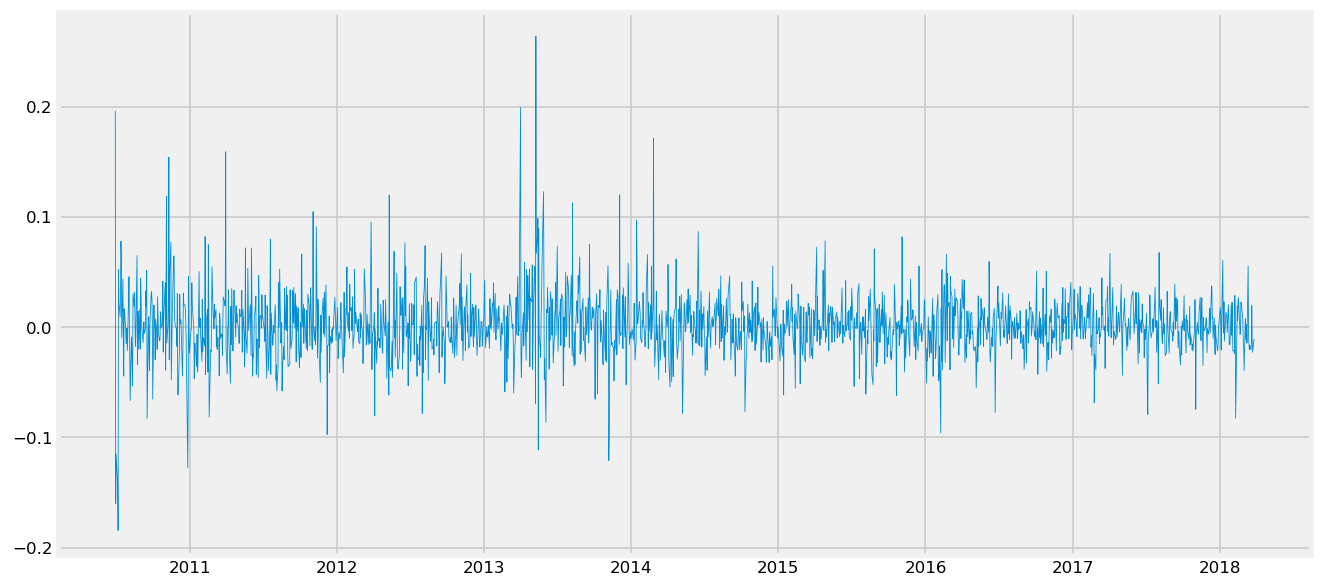

In [7]:
diff_series = differencing(lnseries)
plt.figure(figsize=(12,6),dpi=120)
plt.plot(tsh['Date'][1:],diff_series, Linewidth=0.5)

## Augmented Dickey-Fuller Test

In [8]:
#check for original data
res1 = adfuller(series)
print('ADF Statistic: %f' % res1[0])
print('p-value: %f' % res1[1])
print('Critical Values:')
for key, value in res1[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.962224
p-value: 0.766792
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [9]:
#check for log(data)
res2 = adfuller(lnseries)
print('ADF Statistic: %f' % res2[0])
print('p-value: %f' % res2[1])
print('Critical Values:')
for key, value in res2[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.442193
p-value: 0.561890
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [10]:
#check for differenced data
res3 = adfuller(diff_series)
print('ADF Statistic: %f' % res3[0])
print('p-value: %f' % res3[1])
print('Critical Values:')
for key, value in res3[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -19.626469
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


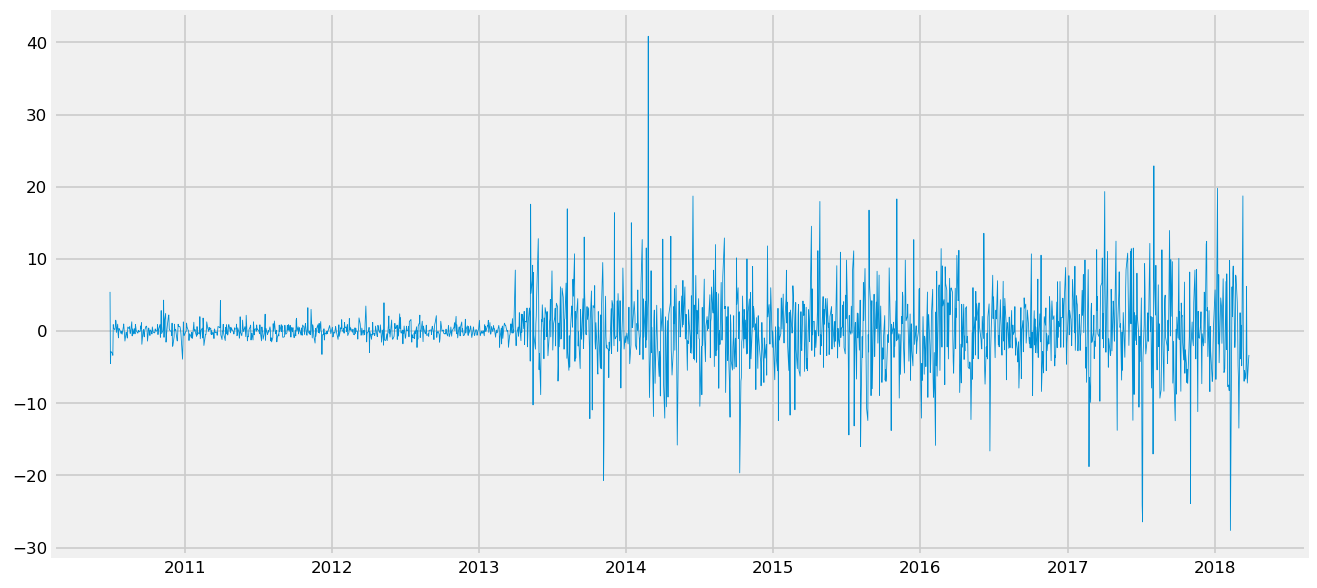

In [11]:
#differencing the original data
diff_orig = differencing(series)
plt.figure(figsize=(12,6),dpi=120)
plt.plot(tsh['Date'][1:],diff_orig, Linewidth=0.5)

In [12]:
#Dickey_Fuller test on original differenced data
res4 = adfuller(diff_orig)
print('ADF Statistic: %f' % res4[0])
print('p-value: %f' % res4[1])
print('Critical Values:')
for key, value in res4[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -15.608990
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
